In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
class Linear_Regression():

   #Declaring number of iterations and learning rate
   def __init__( self, learning_rate, no_of_iterations ) :
          self.learning_rate = learning_rate
          self.no_of_iterations = no_of_iterations

    # fit function to train the model
   def fit( self, X, Y ) :

        # no_of_records -> m
        #no_of_features -> n

        self.m, self.n = X.shape

        # initiating the weight and bias
        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X
        self.Y = Y


        # implementing Gradient Descent for Optimization
        for i in range( self.no_of_iterations ) :
            self.update_weights()


    # function to update weights in gradient descent
   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights and bias
        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:
   def predict( self, X ) :
        return X.dot( self.w ) + self.b


In [ ]:
# loading the data

salary_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
X = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
#Splitting into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
# printing the parameter values i.e., weights & bias

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9305.218367917463
bias =  27197.589910905866


y = 9305(x) + 27197

salary = 9305 * (experience) + 27197


In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
test_data_prediction

array([ 90473.07481274,  56974.28868824,  54182.72317787,  41155.41746278,
        45808.02664674,  93264.64032312,  65348.98521937, 116527.68624291,
        64418.46338258])

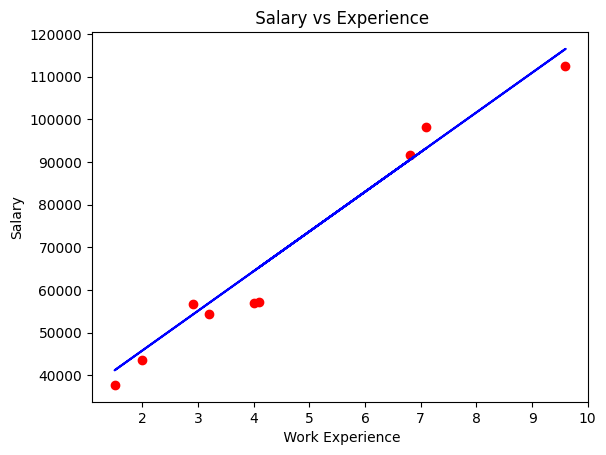

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()